# Convolutional Nueral Net From Scratch

For UCLA Math 156: Machine Learning with Prof. Lara Kassab, Spring 2024 \
Created by Sia Phulambrikar, Anya Smolentseva, and Nathan Wetmore

## Imports and Data Preprocessing

Note: to run this code please dowload the Tom and Jerry dataset from Kaggle [here](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification).\
You will need to drag all images from the four seperate class folders into a single new folder titled `frames`. The `frames` folder and the `ground_truths.csv` must be located in the same directory as this notebook.

In [14]:
#imports required for code
import pandas as pd
import cv2 #run pip install opencv-python
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Image Samples

In [15]:
#set the image size we want to use
desired_width = 100
desired_height = 100

In [6]:
# Read ground truth CSV
ground_truth = pd.read_csv('ground_truth.csv')

# Sort the CSV by filename
#ground_truth = ground_truth.sort_values(by='filename').reset_index(drop=True)

# Get sorted list of filenames
csv_filenames = ground_truth['filename'].values

# Function to load and preprocess a single image
def load_and_preprocess_image(filename):
    img = cv2.imread(os.path.join('images', filename))
    if img is not None:
        if len(img.shape) == 2 or img.shape[2] == 1:
            gray_img = img
        else:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_img = cv2.resize(gray_img, (desired_width, desired_height))
        gray_img = gray_img / 255.0
        return gray_img
    else:
        return None

# Load images in the order specified by the CSV file
images = []
for filename in tqdm(csv_filenames):
    img = load_and_preprocess_image(filename)
    if img is not None:
        images.append(img)

# Convert images to a NumPy array
images = np.array(images)

# Check shapes to confirm everything is correct
print(images.shape)


100%|██████████████████████████████████████████████████████████████████████████████| 5478/5478 [01:39<00:00, 55.30it/s]


(5478, 100, 100)


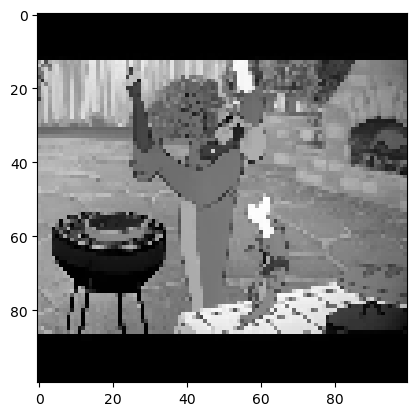

In [7]:
plt.imshow(images[4],cmap='gray')

In [8]:
images.shape

(5478, 100, 100)

### Target Values

In [9]:
#read in classifications
y_true = pd.read_csv('ground_truth.csv')
#y_true = y_true.sort_values(by='filename').reset_index(drop=True)

In [10]:
def class_creator(row):
    '''
    returns a class 0-3 for the 4 image classes
    -row: dataframe row to be worked with
    '''
    #only tom is in the frame = class 0
    if (row['tom'] == 1) & (row['jerry'] == 0):
        val = 0
    #only jerry is in the frame = class 1
    elif (row['tom'] == 0) & (row['jerry'] == 1):
        val = 1
    #neither tom nor jerry is in the frame = class 2
    elif (row['tom'] == 0) & (row['jerry'] == 0):
        val = 2
    #both tom and jerry are in the frame = class 3
    else:
        val = 3
    return val

In [11]:
#create a new column with these class values for each image
y_true['class'] = y_true.apply(class_creator, axis=1)

#drop all other columns and convert to an np array of the class values
y_true = y_true['class'].values

## Model Creation

In [19]:
num_classes = 4
# Convert labels to categorical format
labels = to_categorical(y_true, num_classes)


In [20]:

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [21]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(desired_width, desired_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\alexander.smolentsev\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.3573 - loss: 1.3418 - val_accuracy: 0.4170 - val_loss: 1.2324
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.4940 - loss: 1.1478 - val_accuracy: 0.6113 - val_loss: 0.9239
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.6219 - loss: 0.9154 - val_accuracy: 0.6715 - val_loss: 0.8477
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.6911 - loss: 0.7784 - val_accuracy: 0.7035 - val_loss: 0.7413
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.7475 - loss: 0.6176 - val_accuracy: 0.7500 - val_loss: 0.6787
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.8033 - loss: 0.5247 - val_accuracy: 0.7783 - val_loss: 0.6282
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.8383 - loss: 0.4091 - val_accuracy: 0.7755 - val_loss: 0.6307
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.8645 - loss: 0

In [24]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8166 - loss: 0.6279
Validation loss: 0.6252709627151489
Validation accuracy: 0.805656909942627


Training vs. Validation Accuracy: Since the training and validation accuracies are close (81.66% vs. 80.57%), this suggests that the model is not overfitting. Overfitting would typically show a much higher training accuracy compared to validation accuracy.

Loss Values: The loss values (0.6279 for training and 0.6253 for validation) are also quite close, which also shows that the model is not overfitting.